In [1]:
library(dplyr)
library(ggplot2)


ZOTU_genus <- read.csv("zotu_genus_data.csv", row=1)






Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




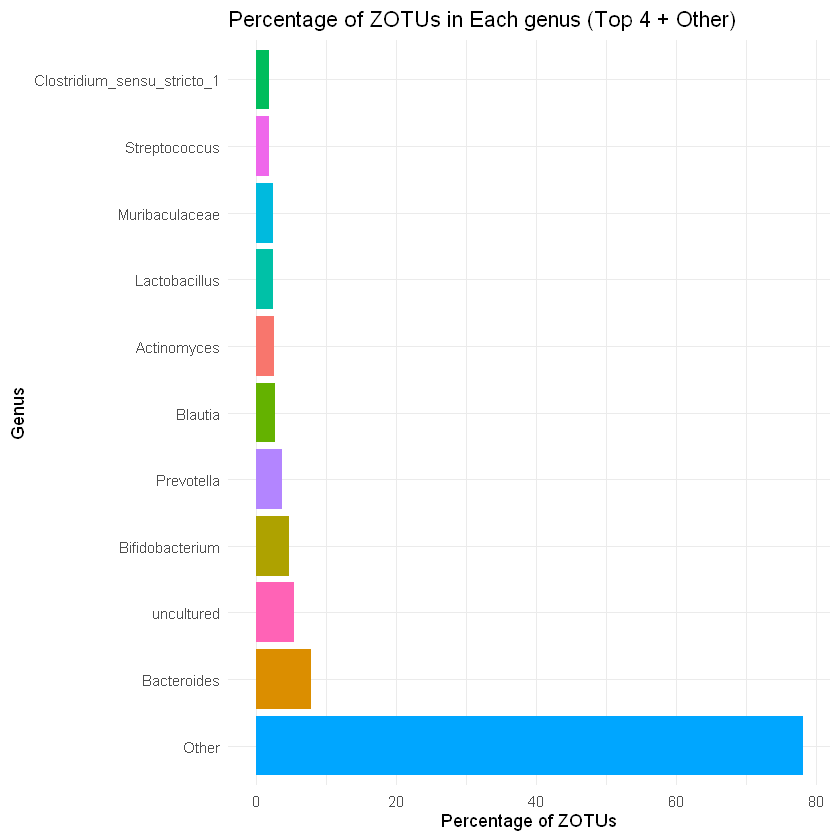

In [2]:
# Assuming ZOTU_genus is your data frame
# Summarize the data to get the count of ZOTUs per phylum
phylum_summary <- ZOTU_genus %>%
  group_by(genus_name) %>%
  summarise(ZOTU_count = n()) %>%
  mutate(Percent = (ZOTU_count / sum(ZOTU_count)) * 100)

# Select the top 4 most common phyla and group the rest into "Other"
top_phyla <- phylum_summary %>%
  arrange(desc(ZOTU_count)) %>%
  head(10)

# Combine the rest into "Other"
other_phyla <- phylum_summary %>%
  arrange(desc(ZOTU_count)) %>%
  slice(5:n()) %>%
  summarise(genus_name = "Other", ZOTU_count = sum(ZOTU_count), Percent = sum(Percent))

# Combine the top phyla with "Other"
final_phylum_summary <- bind_rows(top_phyla, other_phyla)

# Plotting the percentage of ZOTUs in each phylum, including "Other"
ggplot(final_phylum_summary, aes(x = reorder(genus_name, -Percent), y = Percent, fill = genus_name)) +
  geom_bar(stat = "identity") +
  coord_flip() +  # Flip the coordinates for better readability
  labs(title = "Percentage of ZOTUs in Each genus (Top 4 + Other)",
       x = "Genus",
       y = "Percentage of ZOTUs") +
  theme_minimal() +
  theme(legend.position = "none")


In [3]:
# Step 6: Correlation with melatonin (if melatonin data is available)
# Load melatonin data
melatonin_data <- read.csv("melatonin_data.csv")  # Assuming you have a CSV with melatonin levels

Study_variable <- 'Melatonin_pg_g_Stool'  

as.symbol(Study_variable)
Ages <- c('all' , '3 months', '6 months', '12 months')

Age <- Ages[4]     #'all' , '3 months', '6 months';, '12 months'


Melatonin_pg_g_Stool

In [4]:
# Load the relative abundance data
relative_abundance <- read.csv("relative_abundance.csv")
# Assuming relative_abundance is your data frame

# Create the new sample_id column by splitting Sample_Code_16s and selecting the first two parts
relative_abundance$Sample_Code_16s <- sapply(strsplit(relative_abundance$Sample_Code_16s, "-"), function(x) {
  if (length(x) >= 2) {
    paste(x[1:2], collapse = "-")
  } else {
    relative_abundance$Sample_Code_16s  # If there's no second part, keep the original Sample_Code_16s
  }
})

# View the first few rows to check the result
head(relative_abundance)



Sample_Code_16s ZOTU1       ZOTU4       ZOTU6      ZOTU19      ZOTU39     
1 C03-03          0.390356661 0.350153841 0.12823773 0.027110609 0.013319833
2 C04-03          0.008271405 0.023992615 0.00000000 0.000036900 0.000000000
3 C05-03          0.169077744 0.047641891 0.03738045 0.028917938 0.000000000
4 C25-06          0.000036400 0.015116039 0.11721603 0.006381249 0.000000000
5 F300-06         0.006014399 0.005890573 0.21763280 0.002370381 0.006951938
6 F300-06         0.007851085 0.007806050 0.12846956 0.027681453 0.002086617
  ZOTU2       ZOTU463     ZOTU3039    ZOTU13      ⋯ ZOTU1200 ZOTU2158 ZOTU2726
1 0.012079684 0.001263697 0.002637280 0.006499011 ⋯ 0        0        0       
2 0.002160166 0.000000000 0.000000000 0.000000000 ⋯ 0        0        0       
3 0.007967799 0.000689593 0.000562168 0.000007500 ⋯ 0        0        0       
4 0.033847311 0.000024300 0.000000000 0.000000000 ⋯ 0        0        0       
5 0.022695512 0.000212273 0.000088400 0.000000000 ⋯ 0        0        0       
6 0.019845380 0.001381070 0.000000000 0.000000000 ⋯ 0        0        0       
  ZOTU5466 ZOTU4622 ZOTU5051 ZOTU5191 ZOTU2931 ZOTU2546 ZOTU3456
1 0        0        0        0        0        0        0       
2 0        0        0        0        0        0        0       
3 0        0        0        0        0        0        0       
4 0        0        0        0        0        0        0       
5 0        0        0        0        0        0        0       
6 0        0        0        0        0        0        0

In [5]:
# Perform the merge, including only rows with matching Sample_Code_16s in both data frames
relative_abundance_with_age <- merge(relative_abundance, 
                                     melatonin_data[, c("Sample_Code_16s", "age_group", "Melatonin_pg_g_Stool")], 
                                     by = "Sample_Code_16s", 
                                     all = FALSE)

# The result will be a data frame with only matching Sample_Code_16s
head(relative_abundance_with_age)

# Save the dataframe to a CSV file
write.csv(relative_abundance_with_age, "relative_abundance_with_age.csv", row.names = FALSE)


Sample_Code_16s ZOTU1       ZOTU4       ZOTU6     ZOTU19      ZOTU39     
1 F300-06         0.006014399 0.005890573 0.2176328 0.002370381 0.006951938
2 F300-06         0.006014399 0.005890573 0.2176328 0.002370381 0.006951938
3 F300-06         0.007851085 0.007806050 0.1284696 0.027681453 0.002086617
4 F300-06         0.007851085 0.007806050 0.1284696 0.027681453 0.002086617
5 F302-03         0.000065100 0.175288852 0.2946810 0.001210055 0.000000000
6 F302-03         0.000046400 0.213861386 0.2057859 0.003125000 0.000000000
  ZOTU2      ZOTU463     ZOTU3039 ZOTU13  ⋯ ZOTU2726 ZOTU5466 ZOTU4622 ZOTU5051
1 0.02269551 0.000212273 8.84e-05 0.0e+00 ⋯ 0        0        0        0       
2 0.02269551 0.000212273 8.84e-05 0.0e+00 ⋯ 0        0        0        0       
3 0.01984538 0.001381070 0.00e+00 0.0e+00 ⋯ 0        0        0        0       
4 0.01984538 0.001381070 0.00e+00 0.0e+00 ⋯ 0        0        0        0       
5 0.08039711 0.000091100 0.00e+00 1.3e-05 ⋯ 0        0        0        0       
6 0.13763923 0.000278465 0.00e+00 0.0e+00 ⋯ 0        0        0        0       
  ZOTU5191 ZOTU2931 ZOTU2546 ZOTU3456 age_group Melatonin_pg_g_Stool
1 0        0        0        0        6         155.03              
2 0        0        0        0        6          93.59              
3 0        0        0        0        6         155.03              
4 0        0        0        0        6          93.59              
5 0        0        0        0        3         119.22              
6 0        0        0        0        3         119.22

`summarise()` has grouped output by 'age_group'. You can override using the `.groups` argument.


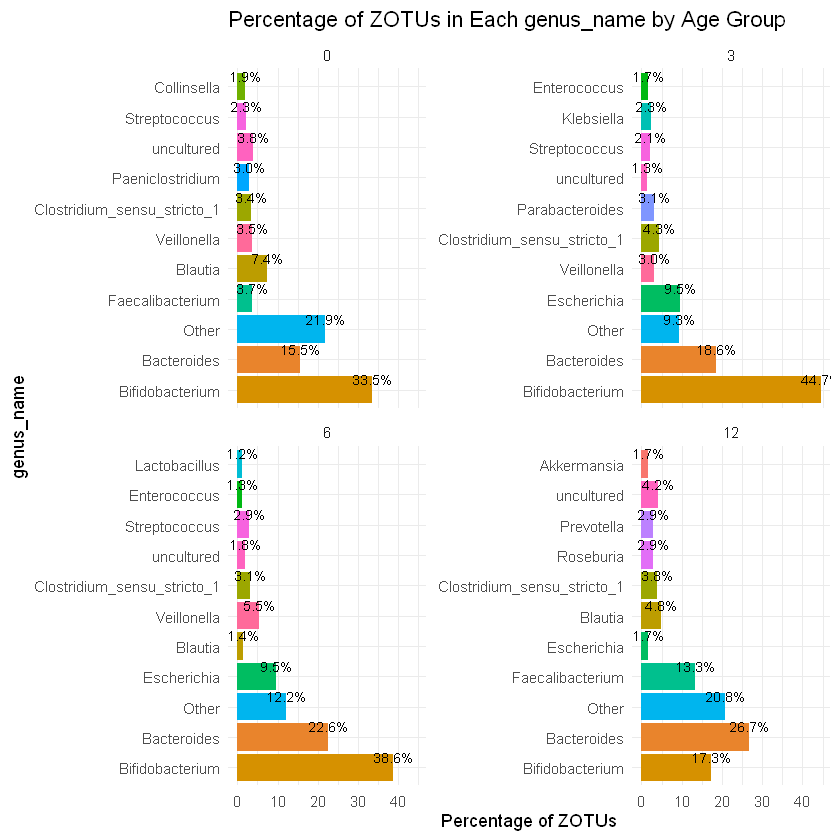

In [7]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)

# Assuming relative_abundance_with_age and ZOTU_genus are your data frames

# Melt the relative abundance data into a long format for easier analysis
relative_long <- relative_abundance_with_age %>%
  pivot_longer(cols = starts_with("ZOTU"), names_to = "OTU_ID", values_to = "Abundance")

# Merge with ZOTU_genus to get the genus_name information
merged_data <- merge(relative_long, ZOTU_genus, by = "OTU_ID")

# Group by age group and genus_name, then summarize the ZOTU counts per genus_name
phylum_summary_by_age <- merged_data %>%
  group_by(age_group, genus_name) %>%
  summarise(Total_Abundance = sum(Abundance)) %>%
  mutate(Percent = (Total_Abundance / sum(Total_Abundance)) * 100)

# Select the top 4 most common phyla per age group and group the rest into "Other"
top_phyla_by_age <- phylum_summary_by_age %>%
  group_by(age_group) %>%
  arrange(desc(Total_Abundance)) %>%
  slice(1:10)

# Combine the rest into "Other" for each age group
other_phyla_by_age <- phylum_summary_by_age %>%
  group_by(age_group) %>%
  arrange(desc(Total_Abundance)) %>%
  slice(11:n()) %>%
  summarise(genus_name = "Other", Total_Abundance = sum(Total_Abundance), Percent = sum(Percent))

# Combine top phyla and "Other"
final_phylum_summary_by_age <- bind_rows(top_phyla_by_age, other_phyla_by_age)

# Plot the percentage of ZOTUs in each genus_name by age group and add percentage labels
ggplot(final_phylum_summary_by_age, aes(x = reorder(genus_name, -Percent), y = Percent, fill = genus_name)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%.1f%%", Percent)), vjust = -0.5, size = 3) +  # Add percentage labels
  facet_wrap(~age_group, scales = "free_y") +  # Create separate plots for each age group
  coord_flip() +  # Flip the coordinates for better readability
  labs(title = "Percentage of ZOTUs in Each genus_name by Age Group",
       x = "genus_name",
       y = "Percentage of ZOTUs") +
  theme_minimal() +
  theme(legend.position = "none")
